In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt 
import cv2
import time

In [2]:
%%time
DATADIR = "/Users/username..."

count = 0
path = os.path.join(DATADIR)
# tic = time.time()

preprocessed_data = []
for img in os.listdir(path):
    if count == 2000:
        break
    try:
        img_array = cv2.imread(os.path.join(path, img))
        if img_array is not None:
            img_array = cv2.resize(img_array, (64, 64))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            img_vector = img_array.flatten()
            count += 1
            preprocessed_data.append(img_vector)
            #plt.imshow(img_array, cmap = "gray")
            #plt.show()
    except Exception as e:
        print(f"Error reading image {img}: {e}")
# toc = time.time()
# print(f"Processing time: {100 * (toc-tic)}ms")
arr = np.array(preprocessed_data)
print(count)

2000
CPU times: user 784 ms, sys: 233 ms, total: 1.02 s
Wall time: 1.3 s


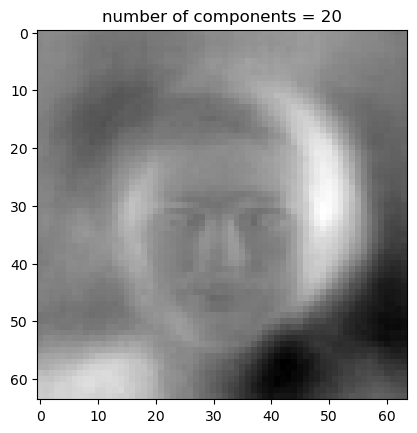

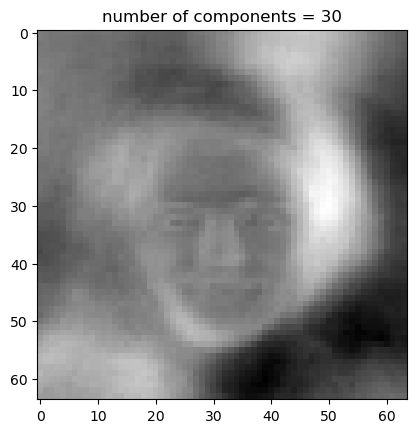

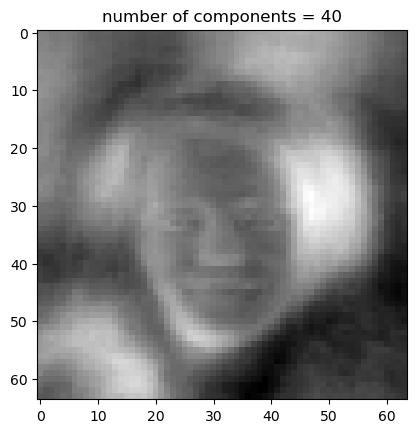

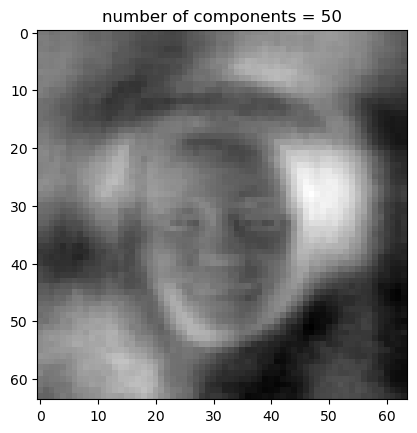

In [3]:
from sklearn.decomposition import PCA 

n_comp = [20,30,40,50]

mean_face = np.mean(arr, axis = 0)
centered_data = arr - mean_face
covariance_matrix = np.cov(centered_data.T)

for n in n_comp:
    pca = PCA(n_components=n)
    pca_data = pca.fit_transform(centered_data)
    inverse_pca_data = pca.inverse_transform(pca_data)
    image = inverse_pca_data[0].reshape(64, 64)
    
    plt.imshow(image, cmap="gray")
    plt.title(f"number of components = {n}")
    plt.show()

In [4]:
pca = PCA(n_components = 50)
pca.fit(covariance_matrix)
reconstructed_faces = pca.transform(covariance_matrix)

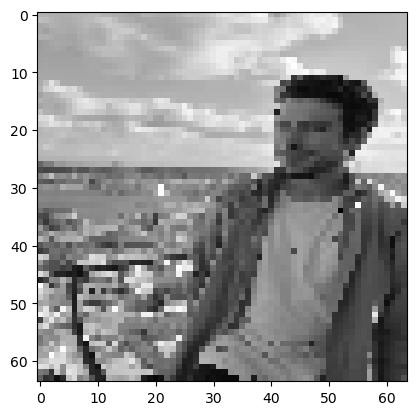

CPU times: user 254 ms, sys: 49.6 ms, total: 303 ms
Wall time: 149 ms


In [5]:
%%time
MY_DATADIR = "/Users/username..."

my_path = os.path.join(MY_DATADIR)
flatten_image = 0
actual_image = []
for img in os.listdir(my_path):
    try:
        my_image = cv2.imread(os.path.join(my_path, img))
        if my_image is not None:
            my_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
            actual_image = my_image
            my_image = cv2.resize(my_image, (64, 64))
            flatten_image = my_image.flatten()
            plt.imshow(my_image, cmap = "gray")
            plt.show()
    except Exception as e:
        print(f"Error reading image {img}: {e}")
my_face_vector = flatten_image

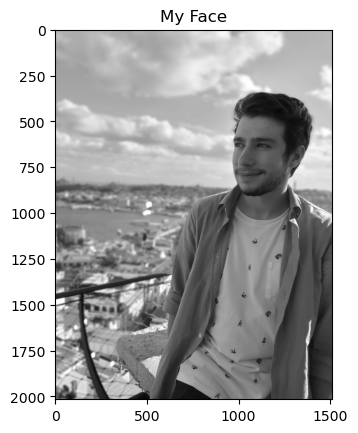

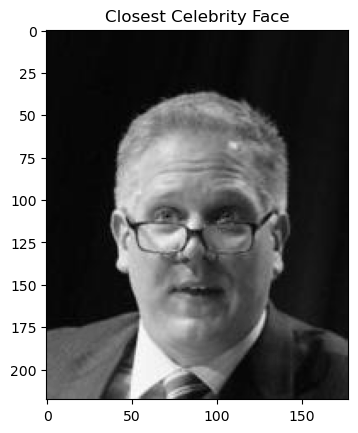

In [6]:
projected_my_face = pca.transform(my_face_vector.reshape(1, -1))

min_distance = np.inf
closest_idx = None
for i, face in enumerate(reconstructed_faces):
    distance = np.linalg.norm(projected_my_face - face)
    if distance < min_distance:
        min_distance = distance
        closest_idx = i

closest_img_path = os.path.join(DATADIR, os.listdir(DATADIR)[closest_idx])

plt.imshow(actual_image, cmap="gray")
plt.title("My Face")
plt.show()

closest_img = cv2.imread(closest_img_path)
closest_img = cv2.cvtColor(closest_img, cv2.COLOR_BGR2GRAY)
plt.imshow(closest_img, cmap="gray")
plt.title("Closest Celebrity Face")
plt.show()

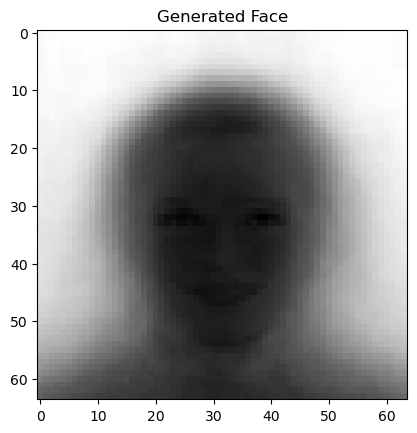

In [7]:
num_faces = 1

random_faces = []
principal_components = np.random.rand(pca.n_components) * 2 - 1 
random_faces.append(principal_components)

projected_faces = pca.inverse_transform(np.array(random_faces))

for face in projected_faces:
    face_img = face + mean_face
    face_img = face_img.reshape(64, 64)  
    plt.imshow(face_img, cmap="gray")
    plt.title(f"Generated Face")
    plt.show()

In [8]:
from sklearn.metrics import mean_squared_error

reconstructed_data = pca.inverse_transform(reconstructed_faces)

mse_scores = []
for i in range(len(arr)):
    original_face = arr[i]
    reconstructed_face = reconstructed_data[i] + mean_face 
    mse = mean_squared_error(original_face, reconstructed_face)
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)
print(f"Average Mean Squared Error (MSE) for Reconstruction: {average_mse}")

explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
print(f"Percentage of Variance Explained by PCA Components: {explained_variance_ratio*100:.2f}%")

generated_faces = []
for principal_components in random_faces:
    generated_face = pca.inverse_transform(principal_components.reshape(1, -1))[0] + mean_face
    generated_faces.append(generated_face)

generated_mse_scores = []
for i, face in enumerate(generated_faces):
    face_img = face.reshape(64, 64)
    generated_mse = mean_squared_error(mean_face, face - mean_face)
    generated_mse_scores.append(generated_mse)

average_generated_mse = np.mean(generated_mse_scores)
print(f"Average Mean Squared Error (MSE) for Generated Faces: {average_generated_mse}")

Average Mean Squared Error (MSE) for Reconstruction: 5501030.892751448
Percentage of Variance Explained by PCA Components: 99.90%
Average Mean Squared Error (MSE) for Generated Faces: 1993550.7173769742
